In [97]:
import numpy as np 
import pandas as pd 

import seaborn as sns

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from catboost import CatBoostClassifier


In [98]:
train_df = pd.read_csv('train_sessions.csv', index_col = 'session_id')
test_df = pd.read_csv('test_sessions.csv', index_col = 'session_id')
train_df

,site1,time1,site2,time2,site3,time3,site4,time4,site5,time5,...,time6,site7,time7,site8,time8,site9,time9,site10,time10,target
session_id,,,,,,,,,,,,,,,,,,,,,
1,718,2014-02-20 10:02:45,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2,890,2014-02-22 11:19:50,941.0,2014-02-22 11:19:50,3847.0,2014-02-22 11:19:51,941.0,2014-02-22 11:19:51,942.0,2014-02-22 11:19:51,...,2014-02-22 11:19:51,3847.0,2014-02-22 11:19:52,3846.0,2014-02-22 11:19:52,1516.0,2014-02-22 11:20:15,1518.0,2014-02-22 11:20:16,0
3,14769,2013-12-16 16:40:17,39.0,2013-12-16 16:40:18,14768.0,2013-12-16 16:40:19,14769.0,2013-12-16 16:40:19,37.0,2013-12-16 16:40:19,...,2013-12-16 16:40:19,14768.0,2013-12-16 16:40:20,14768.0,2013-12-16 16:40:21,14768.0,2013-12-16 16:40:22,14768.0,2013-12-16 16:40:24,0
4,782,2014-03-28 10:52:12,782.0,2014-03-28 10:52:42,782.0,2014-03-28 10:53:12,782.0,2014-03-28 10:53:42,782.0,2014-03-28 10:54:12,...,2014-03-28 10:54:42,782.0,2014-03-28 10:55:12,782.0,2014-03-28 10:55:42,782.0,2014-03-28 10:56:12,782.0,2014-03-28 10:56:42,0
5,22,2014-02-28 10:53:05,177.0,2014-02-28 10:55:22,175.0,2014-02-28 10:55:22,178.0,2014-02-28 10:55:23,177.0,2014-02-28 10:55:23,...,2014-02-28 10:55:59,175.0,2014-02-28 10:55:59,177.0,2014-02-28 10:55:59,177.0,2014-02-28 10:57:06,178.0,2014-02-28 10:57:11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253557,3474,2013-11-25 10:26:54,3474.0,2013-11-25 10:26:58,141.0,2013-11-25 10:27:03,2428.0,2013-11-25 10:27:04,106.0,2013-11-25 10:27:13,...,2013-11-25 10:27:16,2428.0,2013-11-25 10:27:28,2428.0,2013-11-25 10:27:40,2428.0,2013-11-25 10:27:52,148.0,2013-11-25 10:27:53,0
253558,12727,2013-03-12 16:01:15,12727.0,2013-03-12 16:01:16,2215.0,2013-03-12 16:01:16,38.0,2013-03-12 16:01:17,2215.0,2013-03-12 16:01:17,...,2013-03-12 16:01:17,25444.0,2013-03-12 16:01:18,2215.0,2013-03-12 16:01:18,23.0,2013-03-12 16:01:18,21.0,2013-03-12 16:01:18,0
253559,2661,2013-09-12 14:05:03,15004.0,2013-09-12 14:05:10,5562.0,2013-09-12 14:05:10,5562.0,2013-09-12 14:06:29,5562.0,2013-09-12 14:06:30,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [99]:
features = pd.DataFrame()

sites = train_df[['site%s' % i for i in range(1,11)]].fillna(0).astype(int).values
times = train_df[['time%s' % i for i in range(1,11)]]

for td_index in range(1, 10):
    features['target'] = train_df['target']
    features['time_diff{}'.format(td_index)] = (pd.to_datetime(times['time{}'.format(td_index + 1)]) - pd.to_datetime(times['time{}'.format(td_index)])).dt.total_seconds().fillna(0)
    
features['time_of_session'] = np.sum(features, axis = 1)
features['hour'] = pd.to_datetime(times['time1']).dt.hour
features['dow'] = pd.to_datetime(times['time1']).dt.dayofweek
features['month'] = pd.to_datetime(times['time1']).dt.month
features['unique_sites'] = [len(np.unique(session[session != 0])) for session in sites]

In [100]:
features['unique_sites'] = [len(np.unique(session[session != 0])) for session in sites]

In [101]:
features

,target,time_diff1,time_diff2,time_diff3,time_diff4,time_diff5,time_diff6,time_diff7,time_diff8,time_diff9,time_of_session,hour,dow,month,unique_sites
session_id,,,,,,,,,,,,,,,
1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10,3,2,1
2,0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,23.0,1.0,26.0,11,5,2,7
3,0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,2.0,7.0,16,0,12,4
4,0,30.0,30.0,30.0,30.0,30.0,30.0,30.0,30.0,30.0,270.0,10,4,3,1
5,0,137.0,0.0,1.0,0.0,36.0,0.0,0.0,67.0,5.0,246.0,10,4,2,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253557,0,4.0,5.0,1.0,9.0,3.0,12.0,12.0,12.0,1.0,59.0,10,0,11,5
253558,0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,3.0,16,1,3,6
253559,0,7.0,0.0,79.0,1.0,0.0,0.0,0.0,0.0,0.0,87.0,14,3,9,3


(-50.0, 400.0)

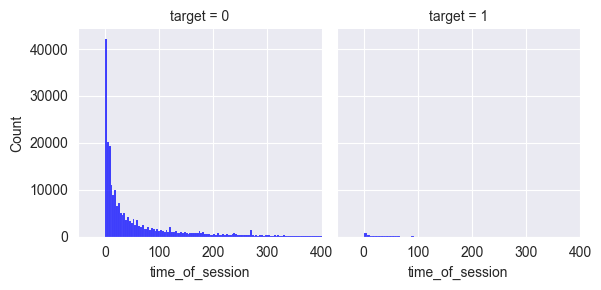

In [102]:
plot = sns.FacetGrid(features, col = 'target')
plot.map(sns.histplot, 'time_of_session', color = 'blue')
plt.xlim(-50, 400)

Text(0.5, 1.0, 'Target = 1')

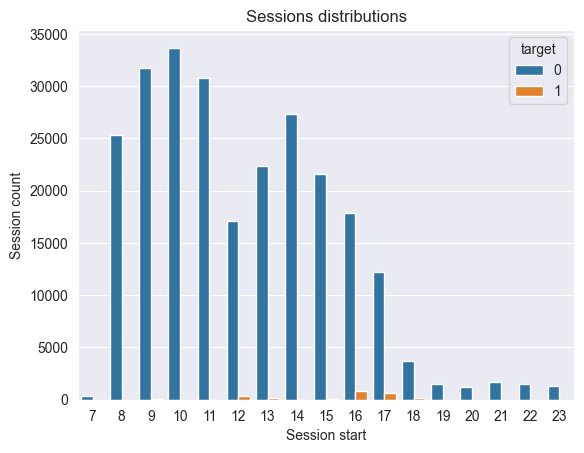

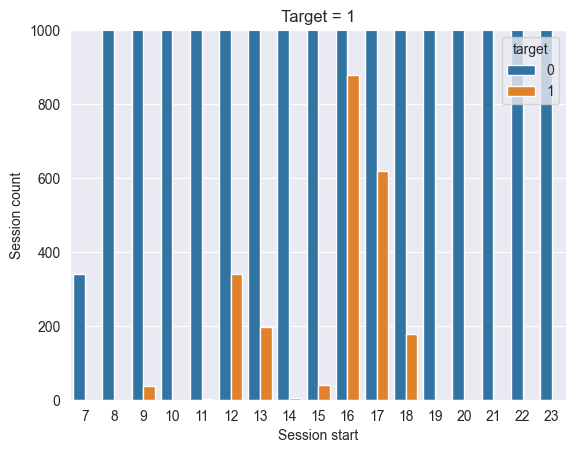

In [103]:
plt.figure()
sns.countplot(x = features['hour'], data = features, hue = 'target')
plt.ylabel('Session count')
plt.xlabel('Session start')
plt.title('Sessions distributions')

plt.figure()
sns.countplot(x = features['hour'], data = features, hue = 'target')
plt.ylim(0, 1000)
plt.ylabel('Session count')
plt.xlabel('Session start')
plt.title('Target = 1')

Text(0.5, 1.0, 'Target = 1')

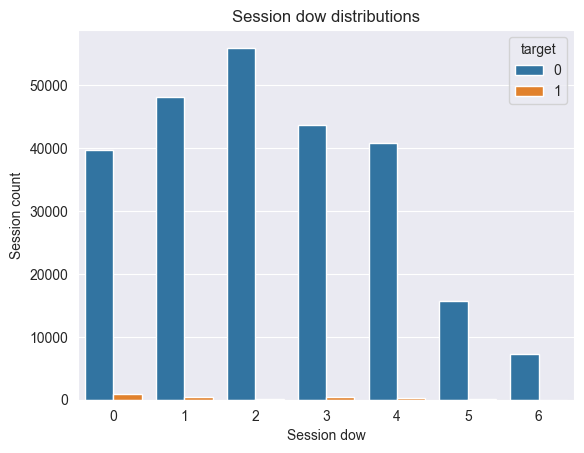

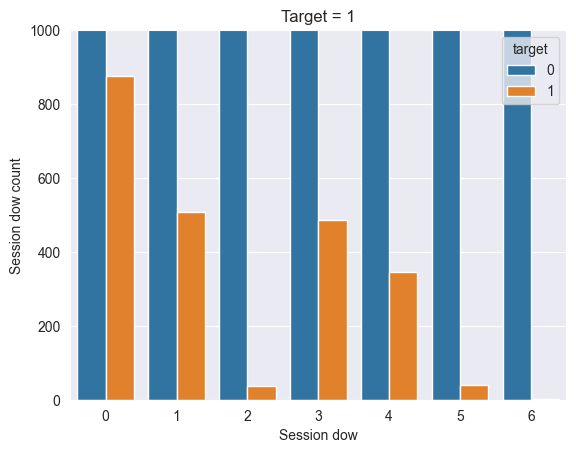

In [104]:
plt.figure()
sns.countplot(x = features['dow'], data = features, hue = 'target')
plt.ylabel('Session count')
plt.xlabel('Session dow')
plt.title('Session dow distributions')

plt.figure()
plt.ylim(0, 1000)
sns.countplot(x = features['dow'], data = features, hue = 'target')
plt.ylabel('Session dow count')
plt.xlabel('Session dow')
plt.title('Target = 1')

Text(0.5, 1.0, 'Target = 1')

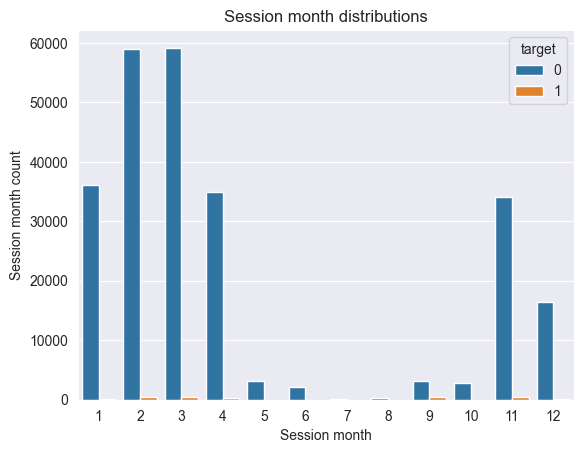

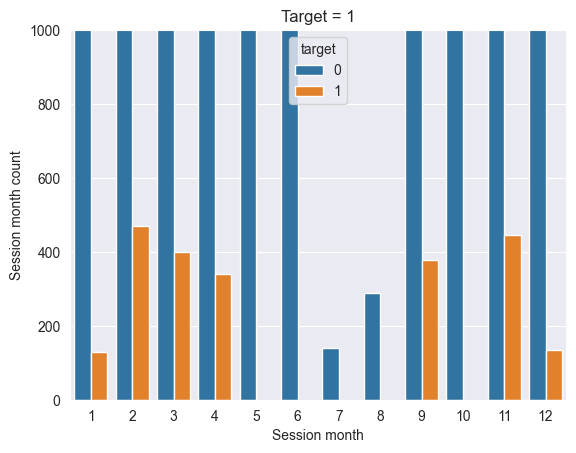

In [105]:
plt.figure()
sns.countplot(x = features['month'], data = features, hue = 'target')
plt.ylabel('Session month count')
plt.xlabel('Session month')
plt.title('Session month distributions')

plt.figure()
plt.ylim(0, 1000)
sns.countplot(x = features['month'], data = features, hue = 'target')
plt.ylabel('Session month count')
plt.xlabel('Session month')
plt.title('Target = 1')

In [106]:
def preprocessing_data(raw_data : pd.DataFrame) -> pd.DataFrame:
    _test = pd.DataFrame()
    sites = raw_data[['site%s' % i for i in range(1,11)]].fillna(0).astype(int).values
    times = raw_data[['time%s' % i for i in range(1,11)]]
    
    for td_index in range(1, 10):
        _test['target'] = raw_data['target']
        _test['time_diff{}'.format(td_index)] = (pd.to_datetime(times['time{}'.format(td_index + 1)]) - pd.to_datetime(times['time{}'.format(td_index)])).dt.total_seconds().fillna(0)
        
    _test['time_of_session'] = np.sum(_test, axis = 1)
    _test['hour'] = pd.to_datetime(times['time1']).dt.hour
    _test['dow'] = pd.to_datetime(times['time1']).dt.dayofweek
    _test['month'] = pd.to_datetime(times['time1']).dt.month
    _test['unique_sites'] = [len([np.unique(session[session != 0])]) for session in sites]
    
    _test['target_hour'] = np.where( ( (_test['hour'] >= 12) & (_test['hour'] <= 13) ) | ( (_test['hour'] >= 16) & (_test['hour'] <= 18)) , 1 , 0)

    _test['target_dow'] = np.where( ((_test['dow'] == 5) | (_test['dow'] == 6) ), 1, 0)
    
    _test['target_month'] = np.where( (_test['month'] >= 5) | (_test['month'] <= 8), 0, 1)    
    return _test

In [107]:
test = preprocessing_data(train_df)
y = test['target']
test.drop(columns = ['target'], inplace = True)
test

,time_diff1,time_diff2,time_diff3,time_diff4,time_diff5,time_diff6,time_diff7,time_diff8,time_diff9,time_of_session,hour,dow,month,unique_sites,target_hour,target_dow,target_month
session_id,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10,3,2,1,0,0,0
2,0.0,1.0,0.0,0.0,0.0,1.0,0.0,23.0,1.0,26.0,11,5,2,1,0,1,0
3,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,2.0,7.0,16,0,12,1,1,0,0
4,30.0,30.0,30.0,30.0,30.0,30.0,30.0,30.0,30.0,270.0,10,4,3,1,0,0,0
5,137.0,0.0,1.0,0.0,36.0,0.0,0.0,67.0,5.0,246.0,10,4,2,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253557,4.0,5.0,1.0,9.0,3.0,12.0,12.0,12.0,1.0,59.0,10,0,11,1,0,0,0
253558,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,3.0,16,1,3,1,1,0,0
253559,7.0,0.0,79.0,1.0,0.0,0.0,0.0,0.0,0.0,87.0,14,3,9,1,0,0,0


In [108]:
SEED = 42
X_train, X_test, y_train, y_test = train_test_split(test, y, test_size=0.2, random_state=SEED)

params = {
    "loss_function" : 'Logloss',
    'eval_metric' : 'AUC',
    'verbose' : 200,
    'random_seed' : SEED
}


cb_1 = CatBoostClassifier(**params)

cb_1.fit(X_train, y_train,
       eval_set = (X_test, y_test),
       use_best_model = True)

Learning rate set to 0.117701
0:	test: 0.8783168	best: 0.8783168 (0)	total: 13.2ms	remaining: 13.2s
200:	test: 0.9763126	best: 0.9763520 (198)	total: 1.88s	remaining: 7.46s
400:	test: 0.9773382	best: 0.9774028 (399)	total: 3.74s	remaining: 5.58s
600:	test: 0.9776160	best: 0.9777824 (589)	total: 5.6s	remaining: 3.71s
800:	test: 0.9780921	best: 0.9781339 (738)	total: 7.46s	remaining: 1.85s
999:	test: 0.9784056	best: 0.9785819 (868)	total: 9.3s	remaining: 0us

bestTest = 0.9785818526
bestIteration = 868

Shrink model to first 869 iterations.


In [109]:
y_pred = cb_1.predict_proba(X_test)[:, 1]
y_pred

array([1.77009360e-06, 4.87633411e-04, 9.31742172e-02, ...,
       5.65123480e-03, 4.16197910e-04, 9.24648988e-09])

In [110]:
from sklearn.metrics import roc_auc_score 
auc = roc_auc_score(y_test, y_pred)

In [111]:
auc

0.9785818526388779

In [114]:
cb_1.save_model('catboost_model.cbm', format='cbm')